# Ravignani (2018)<br />**Harbor seal**

- **Paper:** Ravignani, A. Spontaneous rhythms in a harbor seal pup calls. BMC Res Notes 11, 3 (2018). https://doi.org/10.1186/s13104-017-3107-6
- **Dataset:** Ravignani, Andrea (2018): Maternal attraction calls of seal pup: rhythm and timing of spontaneous vocalisations. figshare. Dataset. https://doi.org/10.6084/m9.figshare.5616490.v1 
- **Dataset license:** Attribution 4.0 International (CC BY 4.0) 

## Background 

"The data presents timing of spontaneous vocal rhythms in a harbor seal pup (Phoca vitulina). Data were collected to find spontaneous vocal rhythms in this individual in order to design individually-adapted and ecologically-relevant stimuli for a later playback experiment.

The calls of one seal pup were recorded. The audio recordings were annotated using Praat, a sound analysis software. The annotated onsets and offsets of vocalizations were then imported in a Python script. The script extracted three types of timing information for each call: the duration of calls, the intervals between calls’ onsets, and the intervals between calls’ maximum-intensity peaks. Based on the annotated data, available to download, I provide simple descriptive statistics for these temporal measures, and compare their distributions."

## Dataset

The dataset is available from  where the following documentation also comes from:

- `durations_all.csv` - all call durations in milliseconds
- `IOI_all.csv` - inter-onset intervals (IOIs): the time elapsed between the onsets of two successive calls, in milliseconds
- `IOI_short.csv` - IOIs within approximately 4 times the minimum value, in milliseconds
- `IPI_all.csv` - inter-peak intervals (IPIs): the time between the maximum-intensity peak of one call and the maximum-intensity peak of the next call, in milliseconds
- `IPI_short.csv` - IPIs within approximately 4 times the minimum value, in milliseconds
- `textgrid_IOI_IPI_dur_01.py` - this script receives, as input, a wave file (.wav) and its corresponding Praat Textgrid file (.TextGrid). These two files must have the same name and be both in the same directory as this script. The script extract durational information of seal pups' calls from annotated wav files.
- `supplement_datanote01` - descriptive statistics and distribution for the durations and intervals in the files listed above: sample size, mean, median and standard deviation

The purpose of the threshold (4 times minimum value) in the IOI_short.csv and IPI_short.csv files was to focus on the timing within vocalization bouts, as opposed to the pooled timing within and between bouts in IOI_all.csv and IPI_all.csv.



## Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rhythmplot import *

# Or manually define DATADIR = '/path/to/the/dir/with/all/datasets'
from config import DATA_DIR

# Function to save figures: you can easily toggle this on/off globally
savefig = get_figure_saver(group='ravignani2018', save_pdf=True, save_png=True)

In [5]:
# The data basically need no preprocessing; only conversion ms -> s
all = np.loadtxt(f'{DATA_DIR}/ravignani2018/IOI_all.csv') / 1000
# save_intervals(all, 'ravignani2018', 'all')

short = np.loadtxt(f'{DATA_DIR}/ravignani2018/IOI_short.csv') / 1000
# save_intervals(short, 'ravignani2018', 'short')

## Plotting

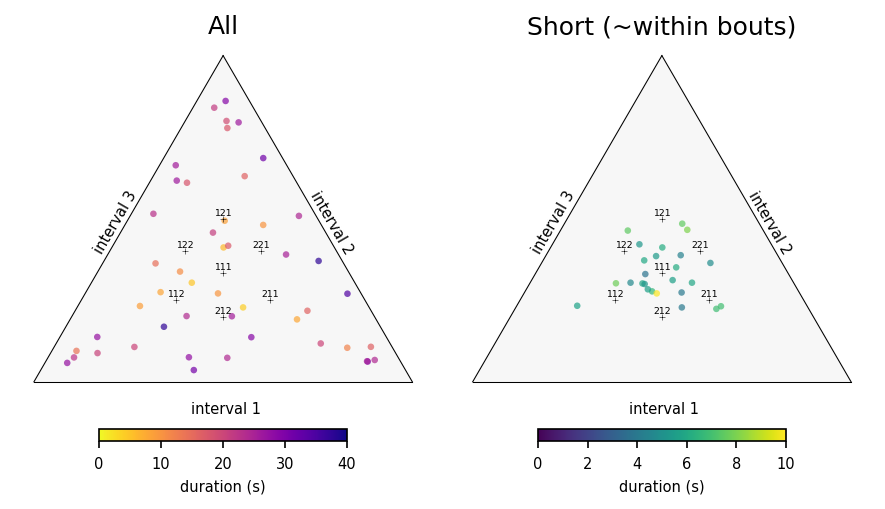

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.5), tight_layout=True)
kws = dict(scatter_kws=dict(s=10, alpha=.7), ratio_kws=dict(factors=[1,2]))

intervals = load_intervals('ravignani2018', 'all')
motifs, duration = normalize(ngram_motifs(intervals, length=3))
ternary_motif_plot(motifs, duration, min_dur=0, max_dur=40, ax=ax1, **kws)
ax1.set_title('All')

intervals = load_intervals('ravignani2018', 'short')
motifs, duration = normalize(ngram_motifs(intervals, length=3))
ternary_motif_plot(motifs, duration, min_dur=0, max_dur=10, cmap='viridis', ax=ax2, **kws)
ax2.set_title('Short (~within bouts)')

savefig('all-vs-short')